# Atividade: Petalas

**INSTITUTO FEDERAL DE MINAS GERAIS BAMBUI**

**Pofessor:** Ciniro Nametala

**Aluno:** Ricardo Antonio

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pygwalker as pyg
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import plotly.graph_objects as go

<h2>IMPLEMENTAÇÃO DO PERCEPTRON<h2>

In [92]:
def degrau_bipolar(u):
   if u >= 0:
      y=1
   else:
      y=-1
   return y

In [93]:
#Passo 1

dados = pd.read_csv('dataset_iris.csv', sep=';')
print(dados.shape)
n_variaveis = dados.shape[1]-1
print(n_variaveis)
n_amostras = dados.shape[0]
print(n_amostras)
x = dados.iloc[:, 0:].values
print(x)
dados['x1'] = pd.to_numeric(dados['x1'], errors='coerce')
dados['x2'] = pd.to_numeric(dados['x2'], errors='coerce')
dados['x3'] = pd.to_numeric(dados['x3'], errors='coerce')
dados['y'] = pd.to_numeric(dados['y'], errors='coerce')

(30, 4)
3
30
[[-0.6508  0.1097  4.0009 -1.    ]
 [-1.4492  0.8896  4.4005 -1.    ]
 [ 2.085   0.6876 12.071  -1.    ]
 [ 0.2626  1.1476  7.7985  1.    ]
 [ 0.6418  1.0234  7.0427  1.    ]
 [ 0.2569  0.673   8.3265 -1.    ]
 [ 1.1155  0.6043  7.4446  1.    ]
 [ 0.0914  0.3399  7.0677 -1.    ]
 [ 0.0121  0.5256  4.6316  1.    ]
 [-0.0429  0.466   5.4323  1.    ]
 [ 0.434   0.687   8.2287 -1.    ]
 [ 0.2735  1.0287  7.1934  1.    ]
 [ 0.4839  0.4851  7.485  -1.    ]
 [ 0.4089 -0.1267  5.5019 -1.    ]
 [ 1.4391  0.1614  8.5843 -1.    ]
 [-0.9115 -0.1973  2.1962 -1.    ]
 [ 0.3654  1.0475  7.4858  1.    ]
 [ 0.2144  0.7515  7.1699  1.    ]
 [ 0.2013  1.0014  6.5489  1.    ]
 [ 0.6483  0.2183  5.8991  1.    ]
 [-0.1147  0.2242  7.2435 -1.    ]
 [-0.797   0.8795  3.8762  1.    ]
 [-1.0625  0.6366  2.4707  1.    ]
 [ 0.5307  0.1285  5.6883  1.    ]
 [-1.22    0.7777  1.7252  1.    ]
 [ 0.3957  0.1076  5.6623 -1.    ]
 [-0.1013  0.5989  7.1812 -1.    ]
 [ 2.4482  0.9455 11.2095  1.    ]
 [ 2.01

In [94]:
# -------------------------------
# 3. Plotly (interativo)
# -------------------------------
fig = go.Figure(data=[go.Scatter3d(
    x=dados['x1'], y=dados['x2'], z=dados['x3'],
    mode='markers',
    marker=dict(
        size=6,
        color=dados['y'],      # cor baseada em y
        colorscale='Viridis',
        opacity=0.8
    )
)])
fig.update_layout(scene=dict(
    xaxis_title='x1',
    yaxis_title='x2',
    zaxis_title='x3'),
    title="Gráfico 3D - Plotly"
)
fig.show()

In [95]:
bias = np.ones((n_amostras,1)) * -1
x = np.hstack((x,bias))
print(x)

[[-0.6508  0.1097  4.0009 -1.     -1.    ]
 [-1.4492  0.8896  4.4005 -1.     -1.    ]
 [ 2.085   0.6876 12.071  -1.     -1.    ]
 [ 0.2626  1.1476  7.7985  1.     -1.    ]
 [ 0.6418  1.0234  7.0427  1.     -1.    ]
 [ 0.2569  0.673   8.3265 -1.     -1.    ]
 [ 1.1155  0.6043  7.4446  1.     -1.    ]
 [ 0.0914  0.3399  7.0677 -1.     -1.    ]
 [ 0.0121  0.5256  4.6316  1.     -1.    ]
 [-0.0429  0.466   5.4323  1.     -1.    ]
 [ 0.434   0.687   8.2287 -1.     -1.    ]
 [ 0.2735  1.0287  7.1934  1.     -1.    ]
 [ 0.4839  0.4851  7.485  -1.     -1.    ]
 [ 0.4089 -0.1267  5.5019 -1.     -1.    ]
 [ 1.4391  0.1614  8.5843 -1.     -1.    ]
 [-0.9115 -0.1973  2.1962 -1.     -1.    ]
 [ 0.3654  1.0475  7.4858  1.     -1.    ]
 [ 0.2144  0.7515  7.1699  1.     -1.    ]
 [ 0.2013  1.0014  6.5489  1.     -1.    ]
 [ 0.6483  0.2183  5.8991  1.     -1.    ]
 [-0.1147  0.2242  7.2435 -1.     -1.    ]
 [-0.797   0.8795  3.8762  1.     -1.    ]
 [-1.0625  0.6366  2.4707  1.     -1.    ]
 [ 0.5307  

In [96]:
#Passo 2
y = dados.iloc[:, n_variaveis].values
print(y)

print(f"-1: {(y == -1).sum()}")
print(f"-1: {(y == 1).sum()}")

[-1. -1. -1.  1.  1. -1.  1. -1.  1.  1. -1.  1. -1. -1. -1. -1.  1.  1.
  1.  1. -1.  1.  1.  1.  1. -1. -1.  1. -1.  1.]
-1: 14
-1: 16


In [ ]:
#Passo 3
w = np.random.uniform(-1, 1, n_variaveis+1)

#Passo 4
#taxa de aprendizagem eta
eta = 0.01

#Passo 5
#n_amostras

#Passo 6
tolerancia = 0.01

#Passo 7
erro_medio = tolerancia + 1

#Passo 8
erro_epocas = []

#Passo 9
epoca = 0

#Passo 10
max_epocas = 100

#Passo 11
criterio_erro = True
criterio_epoca = True

#Passo 12 13 14 15 16 17 18 19 20 21 22 23 24
while(criterio_epoca and criterio_erro):
   erro_atual = 0
   epoca = epoca + 1
   
   indices_embaralhados = np.random.permutation(n_amostras)
   for i in range(n_amostras):
      indice_amostra = indices_embaralhados[i]
      xi_amostra = x[indice_amostra, :]
      u = np.dot(w.T, xi_amostra)
      yhat = degrau_bipolar(u)
      e = y[indice_amostra] - yhat
      w = w + ((eta * e) * xi_amostra)
      erro_atual = erro_atual + np.abs(e)
      
   erro_medio = erro_atual/n_amostras
   erro_epocas.append(erro_medio)
   
   if erro_medio <= tolerancia:
      criterio_erro = False
   if epoca >= max_epocas:
      criterio_epoca = False

ValueError: shapes (4,) and (5,) not aligned: 4 (dim 0) != 5 (dim 0)

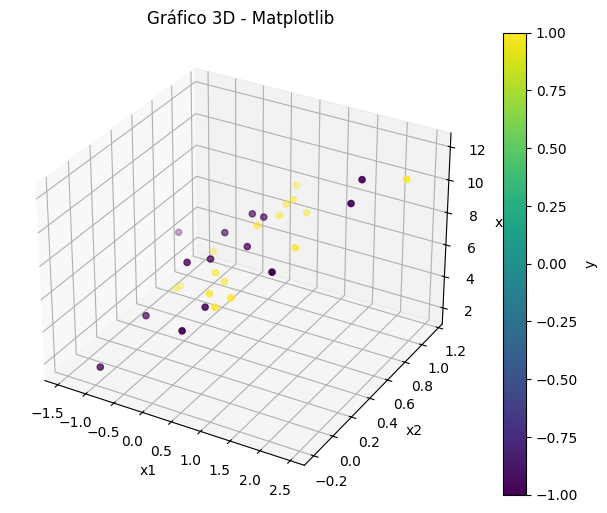

In [ ]:
# -------------------------------
# CONVERGENCIA DE ERROS
# -------------------------------

plt.figure(figsize=(8,6))
plt.plot(erro_epocas[:max_epocas])
plt.title("Convergencia do erro")
plt.xlabel("Quant epocas")
plt.ylabel("Erro")
plt.grid
plt.show()


In [ ]:
print("Conjunto de pesos ideal (w*)")
print(w)

print("Epocas necessárias para convergir")
print(epoca)

<h2>Previsão</h2>

In [ ]:
def previsao(w, x):
   u = np.dot(w.T, x)
   yhat = degrau_bipolar(u)
   return yhat

In [ ]:
# Cria um vetor para receber todas as previsoes realizadas pela RNA

yhat = np.zeros(n_amostras)

#Armazenar todas as previsoes uma para cada amostra
for i in range(n_amostras):
   yhat[i] = previsao(w, x[i,:])

print(yhat)

ValueError: shapes (4,) and (5,) not aligned: 4 (dim 0) != 5 (dim 0)

<h2>ANÁLISE DA QUALIDADE DE CLASSIFICAÇÃO</h2>

In [ ]:
#converter -1 em 0
yhat_display = np.where(yhat == -1,0,yhat)
y_display = np.where(y== -1,0,y)

#gera a matriz de confusao
cm = confusion_matrix(y_display, yhat_display)
print('MATRIZ DE CONFUSÂO')
print(cm)

#plotar matriz de confusão crocante
plt.figure(figize=(4,3))
sns.heatmap(cm, anott=True, fmt='d', cmap='Blue',
            xticklabels=['Mimosa', 'Cheirosa'], yticklabels=['Mimosa', 'Cheirosa'])

plt.title('Matriz de confusão')
plt.xlabel('Valor real')
plt.ylabel('Valor predito')
plt.show()

MATRIZ DE CONFUSÂO
[[14  0]
 [16  0]]


In [ ]:
#calculo da acuracia
acuracia = np.sum(yhat == y)/n_amostras
print("ACURACIA = ", acuracia*100, "%")

ACURACIA =  0.0 %


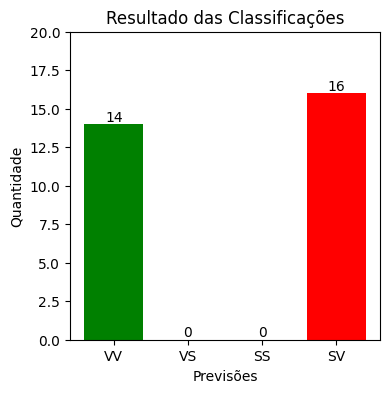

In [ ]:
if cm.shape == (2, 2):
   resultado = [cm[0, 0], cm[0, 1], cm[1, 1], cm[1, 0]]
   labels = ['VV', 'VS', 'SS', 'SV']
   colors = ['green', 'red', 'green', 'red']
   
   plt.figure(figsize=(4, 4))
   plt.bar(labels, resultado, color=colors)
   plt.xlabel('Previsões')
   plt.ylabel('Quantidade')
   plt.title('Resultado das Classificações')
   plt.ylim(0, 20)
   for i, v in enumerate(resultado):
      plt.text(i, v + 0.2, str(v), ha='center')
   plt.show()

In [ ]:
#criar grafico 3d interativo
colors = ['red' if y == -1 else 'blue' for y in yhat]

#criar malha para o hiperplano
x1_range = np.linspace(x[:, 0].min() - 0.5, x[:, 0].max() + 0.5, 20)
x2_range = np.linspace(x[:, 1].min() - 0.5, x[:, 1].max() + 0.5, 20)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

#calcular x3 para o hiperplano: w0*x1 + w1*x2 + w2*x3 + w3*(-1) = 0
#x3 = (w0*x1 + w1*x2 - w3) / (-w2)
x3_grid = (w[0] * x1_grid + w[1] * x2_grid - w[3]) / (-w[2])

fig = go.Figure()

#adicionar o hiperplano
fig.add_trace(go.Surface(
   x=x1_grid,
   y=x2_grid,
   z=x3_grid,
   colorscale='gray',
   opacity=0.3,
   showscale=False,
   name='Hiperplano'
))

#adicionar os pontos
fig.add_trace(go.Scatter3d(
   x=x[:, 0],
   y=x[:, 1],
   z=x[:, 2],
   mode='markers',
   marker=dict(
      size=8,
      color=colors,
      opacity=0.8,
      line=dict(width=1, color='white')
   ),
   name='Amostras'
))

fig.update_layout(
   title='Classificação',
   scene=dict(
      xaxis_title='x1',
      yaxis_title='x2',
      zaxis_title='x3'
   ),
   width=800,
   height=600
)
